## 행렬 분해 기법(Matrix Factorization;MF) - SVD, NMF
- 말그대로 행렬을 분해하여 서로 다른 행렬들의 내적곱의 형태로 나타내는 것을 의미.
- 반드시 정방행렬(nxn)만 사용가능했던 PCA와는 달리, 비정방행렬(mxn)에도 사용이 가능! & 희소행렬(Sparse matrix)에 대해서도 적용가능
- (mxn) = np.dot((mxk),(kxn))

### 3. SVD(Singular Value Decomposition)
- PCA와 유사한 행렬 분해 기법을 사용하는데, 차이점으로는
- 많은 차원을, 특이값 분해를 통해 특이값이 0인 부분과 이에 대응하는 특이벡터들까지 제거함으로써 차원을 축소하는 기법.
- (참고)SVD를 이용하여 차원을 축소하는 방식을 역으로 이용하면, 적은 리뷰데이터에 대해 차원을 늘려서 모르는 리뷰 점수까지 예측할 수 있는 <09.추천 시스템>에 적용 가능.

- 보통 SVD는 넘파이나 사이파이 라이브러리를 이용하여 수행함.
- 넘파이의 SVD 모듈: numpy.linalg.svd
- ★꼭 기억) np로 생성하는 것은 전부 ndarray

In [1]:
import numpy as np
from numpy.linalg import svd

In [2]:
#4x4 랜덤 행렬 a를 생성(랜덤행렬이므로 행렬a는 의존성이 없음)
np.random.seed(121) #랜덤 패키지는 돌릴때마다 값이 바뀌어서 나오므로 seed를 항상 주어야함
a = np.random.randn(4,4) #4x4의 정규분포를 따르는 matrix 생성
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [3]:
##앞의 행렬 a는 svd를 이용해 분해가 가능.
#행렬 a = U*Sigma*V.T
U, Sigma, Vt = svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print(' ')
print('U: \n', np.round(U, 3))
print('Sigma Value: \n', np.round(Sigma,3))
print('V-transpose: \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
 
U: 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value: 
 [3.423 2.023 0.463 0.079]
V-transpose: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [4]:
#분해한 것을 다시 "내적"하여 원본 행렬 a가 나오는지 확인
Sigma_matrix = np.diag(Sigma)
print(Sigma_matrix.shape)
a_ = np.dot(np.dot(U,Sigma_matrix),Vt)
print(np.round(a_, 3)) #나온다!

(4, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 번외: 원본행렬 a가 의존성이 있다면? : Sigma(고유값)에 0이 등장!

In [5]:
print(type(a))
print(a.shape)
print(a)
print(' ')
print(a[2]) #ndarray의 인덱싱-> [ ] ,여기서는 3번쨰 행 의미.
print(a[2,2]) #3번째 행과 3번째 열의 원소

<class 'numpy.ndarray'>
(4, 4)
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]
 
[-0.01411931  0.6296418   1.70964074 -1.32698736]
1.7096407352946972


In [6]:
#의존성 있게 행렬 a를 업데이트-> 3번째 행과 4번째 행은 둘다 1번,2번 행과 관련이 있음.
a[2] = a[0]+a[1]
a[3] = a[0]
print(a)

[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.54214372  0.8987654   1.04147472 -0.0732477 ]
 [-0.21203317 -0.28492917 -0.57389821 -0.44031017]]


In [7]:
##앞의 행렬 a는 svd를 이용해 분해가 가능.
#행렬 a = U*Sigma*V.T
U, Sigma, Vt = svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print(' ')
print('U: \n', np.round(U, 3))
print('Sigma Value: \n', np.round(Sigma,3)) #sigma의 값이 4개 중 2개가 0이 됨.
                                            ##(이것은 선형독립인 특이값이 2개란 뜻-앞에서 2개 행을 의존성 있게 만들었으므로)
print('V-transpose: \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
 
U: 
 [[ 0.246  0.583 -0.071 -0.771]
 [-0.774 -0.017  0.551 -0.31 ]
 [-0.529  0.566 -0.551  0.31 ]
 [ 0.246  0.583  0.623  0.461]]
Sigma Value: 
 [2.663 0.807 0.    0.   ]
V-transpose: 
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.703 -0.444  0.056  0.553]
 [-0.129  0.659 -0.606  0.426]]


In [8]:
np.diag(Sigma[:2]) #앞의 2개 특이값만 뗀 후 대각행렬화

array([[2.66335286, 0.        ],
       [0.        , 0.80703506]])

In [9]:
U[:,:2]

array([[ 0.24568427,  0.58278576],
       [-0.77441642, -0.01670951],
       [-0.52873215,  0.56607625],
       [ 0.24568427,  0.58278576]])

In [10]:
Vt[:2,:]

array([[ 0.16449395, -0.57517122, -0.78233269, -0.17342252],
       [-0.67967123,  0.19439734, -0.13178782, -0.69490191]])

In [11]:
#분해한 것 중 특이값이 2개가 0이 되었으므로 뒤의 0을 제외하고 "내적"하여 원래의 행렬 a가 나오는지 확인.

#시그마
Sigma_ = np.diag(Sigma[:2])
print(Sigma_.shape)
#U
U_ = U[:,:2]
#Vt
Vt_ = Vt[:2,:]

#내적
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_, 3))

(2, 2)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [12]:
np.round(a,3)  #어차피 0을 제외하여 차원을 줄여 내적해도 결과값은 동일!

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

### Truncated SVD
- 일반 SVD vs Truncated SVD 비교
- 'truncated'란 '끝을 잘라버린' 이란 뜻으로, 일반 SVD가 sigma의 특이값 중 0인 것만 제거를 하는 데 비해,
- Truncated SVD는 sigma의 특이값 중 상위값을 제외하고 전부 제거함.=>원본 행렬과 똑같진 않지만, 근사한 행렬이 됨

<scipy의 svd 모듈>(tsvd는 numpy에선 제공x)
- scipy.sparse.linalg.svds -->truncated svd
- scipy.linalg.svd -->svd

In [13]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [14]:
#원본행렬 'b'(6x6)
np.random.seed(121)
b = np.random.random((6,6))
print("원본행렬: \n", np.round(b,3))

#일반 svd로 분해
U, Sigma, Vt = svd(b, full_matrices=False)
print('\n 분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\n Sigma 값 행렬: ', Sigma) #Sigma(특이값)에 0이 없음.

원본행렬: 
 [[0.111 0.211 0.233 0.152 0.83  0.408]
 [0.556 0.746 0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622 0.295 0.93 ]
 [0.406 0.567 0.246 0.226 0.038 0.581]
 [0.829 0.773 0.947 0.736 0.673 0.745]
 [0.512 0.469 0.644 0.821 0.145 0.018]]

 분해 행렬 차원:  (6, 6) (6,) (6, 6)

 Sigma 값 행렬:  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [15]:
#Truncated svd로 분해-원본행렬은 특이값이 0인 게 없음. 하지만 그냥 상위 4개만 포함하고 나머지는 잘라보자.
num_comp = 4
U_, Sigma_, Vt_ = svds(b, k=num_comp) #truncated svd를 의미, k=개수
print('\n 분해 행렬 차원: ', U_.shape, Sigma_.shape, Vt_.shape)
print('\n Sigma 값 행렬: ', Sigma_) #6개->상위 4개만 남기고 사라짐.


 분해 행렬 차원:  (6, 4) (4,) (4, 6)

 Sigma 값 행렬:  [0.55463089 0.83865238 0.88116505 3.2535007 ]


In [16]:
#Truncated svd로 분해한 것을 다시 "내적"을 통해 원본 행렬로 반환하면?
Sigma_diag = np.diag(Sigma_)
b_ = np.dot(np.dot(U_,Sigma_diag),Vt_)
print('복원한 행렬: \n', np.round(b_, 3)) #원본과 값 차이 존재하지만 근사하게 같다.

복원한 행렬: 
 [[0.192 0.218 0.16  0.141 0.816 0.425]
 [0.449 0.722 0.346 0.991 0.969 0.475]
 [0.127 0.889 0.306 0.595 0.28  0.94 ]
 [0.24  0.51  0.397 0.273 0.06  0.572]
 [0.838 0.788 0.939 0.727 0.674 0.738]
 [0.597 0.48  0.566 0.807 0.131 0.035]]


### 사이킷런 Truncated SVD 실습- iris 데이터
- 사이킷런 패키지의 경우 U, Sigma, Vt를 반환하지는 않음.
- 객체, fit(), transform()

In [17]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
iris = load_iris()
X_ftr = iris.data

#2개의 component로 TruncatedSVD 반환(4개의 피처->2개의 특이값 분해)
#객체
tsvd = TruncatedSVD(n_components = 2)
#학습 및 적용
X_tsvd = tsvd.fit_transform(X_ftr)
X_tsvd

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

Text(0, 0.5, 'TSVD Component 2')

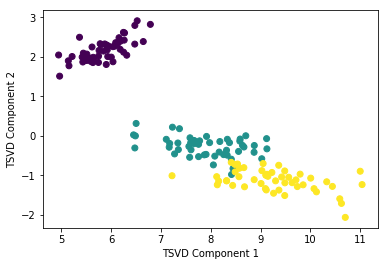

In [19]:
plt.scatter(X_tsvd[:,0], X_tsvd[:,1], c=iris.target) #c(color)는 label값으로 구분
plt.xlabel('TSVD Component 1')
plt.ylabel('TSVD Component 2')

#### TSVD와 PCA 간 관계
- 위의 값은 스케일링을 하지 않고 TSVD를 적용한 것임. 
- 그래서 스케일링까지 하고 다시 시각화를 해보면 PCA와의 그래프와 완전 비슷할 것임(왜냐면 PCA도 SVD를 적용하기 떄문)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#1)표준화
X_scaled = StandardScaler().fit_transform(X_ftr)

#2)TSVD
#객체
tsvd = TruncatedSVD(n_components = 2)
#학습 및 적용
X_tsvd = tsvd.fit_transform(X_scaled)

#PCA
#객체
pca = PCA(n_components = 2)
#학습 및 적용
X_pca = pca.fit_transform(X_scaled)

In [22]:
#3)주성분들(2개)의 변동성
tsvd.explained_variance_ratio_  #첫번째 분산이 73%, 두번째가 23%로 전체 데이터의 96%를 설명하고 있음.

array([0.72962445, 0.22850762])

In [23]:
tsvd.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

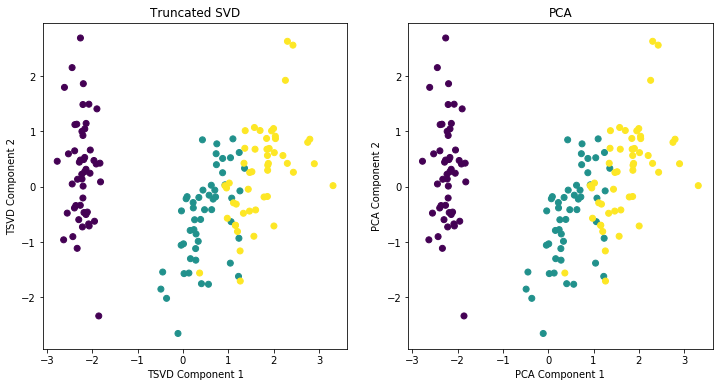

In [24]:
#시각화(X_tsvd, X_pca)
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12,6))

ax1.scatter(X_tsvd[:,0], X_tsvd[:,1], c=iris.target)
ax1.set_xlabel('TSVD Component 1')
ax1.set_ylabel('TSVD Component 2')
ax1.set_title('Truncated SVD')

ax2.scatter(X_pca[:,0], X_pca[:,1], c=iris.target)
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_title('PCA')

plt.show()

- 시각화 결과, TSVD와 PCA 수행 결과가 똑같음을 알 수 있음.
- 더 정확하게 알기 위해서, 변환된 변동 행렬(X_tsvd, X_pca)의 차이를 한번 알아보자.

In [29]:
print((X_tsvd - X_pca).mean()) #np.mean()안에 넣어도 되고. #암튼 값이 아주 작음(차이가 별로 안남)

-2.31915759744498e-15


##### 모델.components_ : 주성분 벡터를 의미(벡터는 방향(부호)이 가장 중요, 출력된 값의 부호는 반대일 수 있음)
- 각 주성분의 개수(=row개수),
- 각 본래 X피처의 개수(=col개수)

- 주성분 벡터 즉, 가장 근사 데이터를 만드는 단위기저벡터는 components_ 속성에서 구할 수 있다. 이 값은 평균을 제거한 특징행렬의 첫 번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫 번째(가장 큰 고윳값에 대응하는) 고유벡터에 해당한다. 고유벡터의 부호 즉 방향은 반대가 될 수도 있다.
- 참고: https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/ 에서 'components' 검색

In [30]:
pca.components_ #행은 comp1, comp2를, 열은 본래의 X피처 4개를 의미. 그리고 안의 값은 바로 주성분 벡터임.
                            #다시말해, 첫번째 행의 값은: 주성분(comp)1에서 X피처 4개가 각각 차지하고 있는 주성분벡터 값을 의미.

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [31]:
tsvd.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [32]:
print((pca.components_-tsvd.components_).mean()) #값이 아주 작음(차이가 별로 안남)

-8.803721640582296e-17


### 4. NMF(Non-Negative Matrix Factorization)
- 행렬 분해 방식, SVD와 비슷한 기법 사용.(그래서 mxn 행렬을 서로 다른 "작은" 행렬로 분할하는 방법.
- 이런 작은 행렬들에는 '잠재요인'이 들어가 있음. (mxn) = (mxk) * (kxn) 
- SVD와 마찬가지로 <09.추천시스템>에 잠재요인 방식으로 사용된다.
- (주의!) NMF는 이름에서도 알 수 있듯이 Non-Negative라 반드시 "양수"값만 가질 수 있음!!

In [25]:
from sklearn.decomposition import NMF #NMF 로드
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
iris = load_iris()
X_ftr = iris.data

In [27]:
#NMF 수행
#객체
nmf = NMF(n_components=2)
#학습 및 적용
X_nmf = nmf.fit_transform(X_ftr)
X_nmf

array([[0.10666948, 1.32441671],
       [0.13650159, 1.1703995 ],
       [0.10290364, 1.21005821],
       [0.14288053, 1.12082689],
       [0.0985986 , 1.33211468],
       [0.15276661, 1.37327809],
       [0.11346615, 1.20536052],
       [0.12919018, 1.25944815],
       [0.13555337, 1.06367809],
       [0.13964519, 1.18267339],
       [0.11549983, 1.39806942],
       [0.14364001, 1.20217757],
       [0.12725351, 1.16623037],
       [0.06736902, 1.15649913],
       [0.04944091, 1.60947898],
       [0.0895253 , 1.59232474],
       [0.08294185, 1.47032916],
       [0.11441437, 1.31208193],
       [0.15609896, 1.41092271],
       [0.11216748, 1.3604248 ],
       [0.1701153 , 1.27693825],
       [0.12648007, 1.32388815],
       [0.0227611 , 1.36315012],
       [0.19540813, 1.16622033],
       [0.19600858, 1.12938927],
       [0.17291716, 1.13837788],
       [0.16213616, 1.21051584],
       [0.12562885, 1.31665785],
       [0.11474036, 1.31671874],
       [0.15527221, 1.13726991],
       [0.

Text(0, 0.5, 'NMF Component 2')

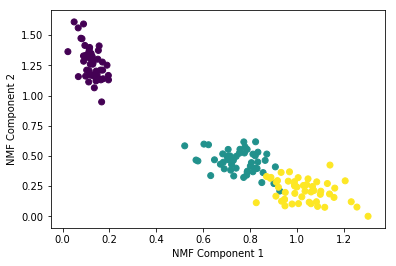

In [28]:
plt.scatter(X_nmf[:,0], X_nmf[:,1], c=iris.target) #c(color)는 label값으로 구분
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

- 스케일링을 적용하고 결과를 반환!(svd와 비교)
- (주의) NMF는 음수값이 있으면 안되기때문에 표준화가 아닌 정규화를 적용.
- 그리고 NMF는 모델.explained_variance_ratio_를 사용할 수 없음.

In [29]:
#1)정규화(표준화를 적용하려 했는데 nmf는 음수값이 들어가면 적용을 할수가없음. but 표준화하면 음수값이 있기때문에(N(0,1)따르니까..))
     #음수값이 없는 minmax로 정규화!
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_ftr)

#2)NMF
#객체
nmf = NMF(n_components=2)
#학습 및 적용
X_nmf = nmf.fit_transform(X_scaled)

In [30]:
nmf.components_

array([[1.46139603, 0.20880569, 2.01832621, 2.04206161],
       [0.63669077, 2.32400399, 0.05362373, 0.        ]])

Text(0, 0.5, 'NMF Component 2')

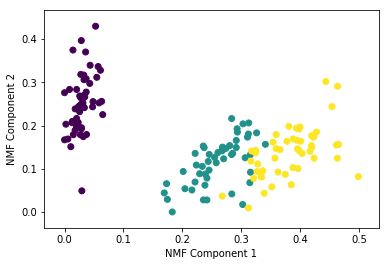

In [31]:
plt.scatter(X_nmf[:,0], X_nmf[:,1], c=iris.target) #c(color)는 label값으로 구분
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

In [32]:
#2)TSVD-얘한테도 정규화를 적용한 후 비교
#객체
tsvd = TruncatedSVD(n_components = 2)
#학습 및 적용
X_tsvd = tsvd.fit_transform(X_scaled)

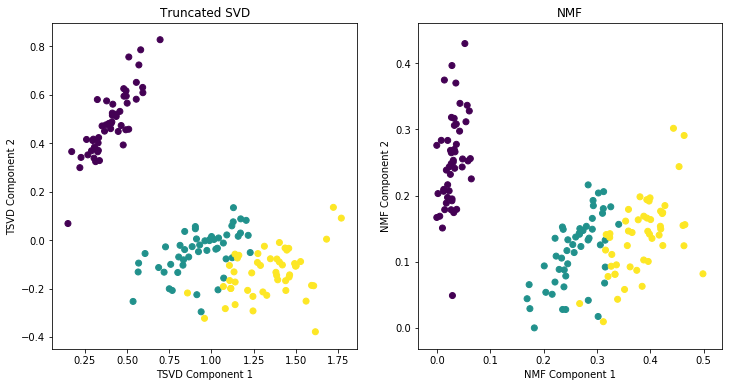

In [33]:
#시각화(X_tsvd, X_pca)
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12,6))

ax1.scatter(X_tsvd[:,0], X_tsvd[:,1], c=iris.target)
ax1.set_xlabel('TSVD Component 1')
ax1.set_ylabel('TSVD Component 2')
ax1.set_title('Truncated SVD')

ax2.scatter(X_nmf[:,0], X_nmf[:,1], c=iris.target)
ax2.set_xlabel('NMF Component 1')
ax2.set_ylabel('NMF Component 2')
ax2.set_title('NMF')

plt.show() #결과가 좀 비슷하나 다르다.